**Importing Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

**Creating dataset**

In [2]:
X,y = make_blobs(n_samples = 500, n_features = 2, centers = 5, random_state = 3)
# n_features = 2 means two coloumns(Coordinate x,y) so that point can can be plotted on 2D plot
# n_samples = 500 means 500 rows (data points)
# centers = 5 means 5 clusters
# randomization ensures same split of data at each time of execution

X = (x1,y1) coordinate
y = belongs to which cluster

**Plotting the dataset**

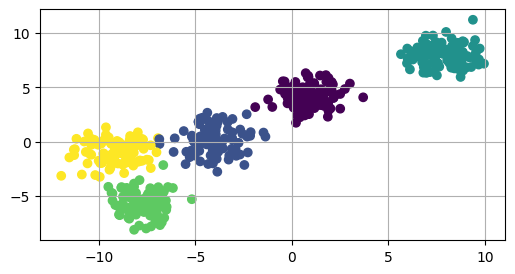

In [3]:
fig = plt.figure(figsize = (6,3))
plt.grid(True)
plt.scatter(X[:,0], X[:,1], c = y)
plt.show()

**Initiating 5 random centers in the range -10 to 10**

In [4]:
k = 5
colors = ['green', 'blue', 'red','yellow', 'cyan']
clusters = {}

for i in range(k):
  center = 10*(2*(np.random.random(X.shape[1],))-1)
  cluster = {
      'center' : center,
      'points' : [],
      'color' : colors[i]
  }
  clusters[i] = cluster

In [5]:
clusters

{0: {'center': array([-1.63833178,  8.45703229]),
  'points': [],
  'color': 'green'},
 1: {'center': array([ 9.13143609, -2.27269097]),
  'points': [],
  'color': 'blue'},
 2: {'center': array([ 2.81022898, -2.93807661]),
  'points': [],
  'color': 'red'},
 3: {'center': array([-8.73995965, -2.264082  ]),
  'points': [],
  'color': 'yellow'},
 4: {'center': array([3.6293918, 3.7016172]), 'points': [], 'color': 'cyan'}}

**Plotting input dataset with 5 random cluster centers**

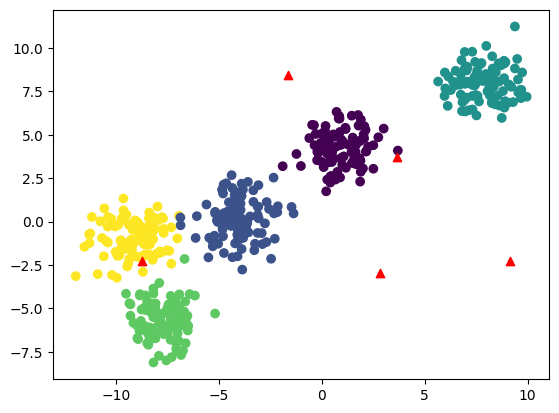

In [6]:
plt.scatter(X[:,0], X[:,1], c = y)

for i in clusters:
  center = clusters[i]['center']
  plt.scatter(center[0], center[1], marker = '^', color = 'red')

plt.show()

**Defining Eucledian distance between two coordinates**

In [7]:
def distance(p1,p2):
  return np.sqrt(np.sum((p1-p2)**2))

for example : p1 = np.array([0,1]) ; p2 = np.array([1,0])  ; distance(p1,p2)  ; output = 1.4142135623730951

**Implementing E-Step** : Assigning cluster as per min distance from cluster centres

In [8]:
def assign_cluster():
  for i in range(X.shape[0]):
    dist = []
    curr_x = X[i]

    for j in range(k):
      dis = distance(curr_x, clusters[j]['center'])
      dist.append(dis)
    curr_cluster = np.argmin(dist)
    # gives index of min item i.e cluster number
    clusters[curr_cluster]['points'].append(curr_x)

**Implementing the M-Step** : Updating cluster centres and then again remove points from clusters

In [9]:
def update_clusters():
  for i in range(k):
    cluster_pts = np.array(clusters[i]['points'])
    if cluster_pts.shape[0]>0:
      new_centre = cluster_pts.mean(axis=0)
      clusters[i]['center'] = new_centre
      clusters[i]['points'] = []

**Plotting the clusters**

In [10]:
def plot_clusters():
    for i in clusters:
        pts = np.array(clusters[i]['points'])
        try :
            plt.scatter(pts[:,0],pts[:,1],c=clusters[i]['color'])
        except:
            pass
        center = clusters[i]['center']
        plt.scatter(center[0],center[1],c = 'black',marker = '^')

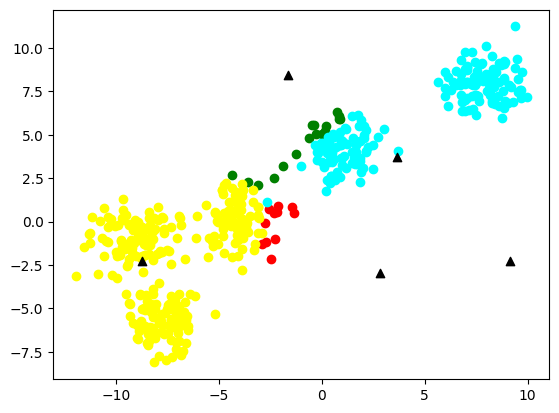

In [11]:
assign_cluster()
plot_clusters()
update_clusters()

**Scikit Learn K - Means**

In [12]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 5)
X,y = make_blobs(n_samples = 500,n_features = 2,centers = 5,random_state = 3)
km.fit(X,y)
KMeans(n_clusters=5)
centers = km.cluster_centers_
labels = km.labels_
labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 1, 0, 2, 2, 0, 4, 2, 1, 2, 1, 0, 1, 2, 0, 2, 1, 2, 2, 1, 3, 3,
       2, 0, 2, 3, 4, 4, 0, 4, 2, 4, 3, 3, 2, 3, 1, 1, 2, 3, 3, 3, 4, 4,
       0, 1, 1, 4, 4, 4, 1, 2, 4, 2, 2, 3, 2, 2, 1, 0, 1, 0, 0, 2, 4, 1,
       0, 0, 3, 0, 3, 2, 3, 2, 3, 0, 2, 4, 3, 3, 0, 3, 0, 4, 1, 4, 0, 1,
       4, 0, 4, 3, 2, 3, 3, 1, 2, 0, 0, 3, 1, 3, 0, 0, 1, 1, 1, 0, 0, 2,
       1, 4, 2, 1, 0, 3, 1, 4, 3, 0, 1, 0, 4, 2, 3, 4, 4, 4, 2, 2, 0, 0,
       2, 1, 1, 4, 0, 4, 0, 2, 2, 3, 0, 1, 4, 2, 1, 1, 2, 0, 2, 2, 0, 0,
       1, 3, 3, 4, 0, 2, 3, 1, 4, 3, 1, 3, 1, 3, 3, 3, 4, 2, 3, 1, 3, 4,
       2, 0, 1, 4, 1, 2, 1, 3, 4, 4, 3, 2, 0, 1, 3, 0, 4, 2, 4, 3, 0, 4,
       2, 2, 2, 3, 3, 1, 2, 4, 4, 2, 1, 2, 2, 2, 3, 1, 0, 1, 2, 2, 1, 4,
       0, 4, 4, 3, 2, 0, 2, 0, 4, 3, 0, 0, 2, 3, 2, 3, 0, 1, 0, 3, 3, 1,
       2, 2, 0, 0, 3, 1, 3, 2, 4, 1, 4, 2, 4, 4, 4, 4, 1, 3, 1, 2, 3, 1,
       4, 0, 1, 1, 1, 4, 2, 2, 0, 3, 3, 1, 0, 0, 2, 0, 4, 0, 1, 1, 4, 4,
       3, 4, 4, 1, 3, 2, 0, 3, 0, 4, 0, 0, 1, 2, 3,

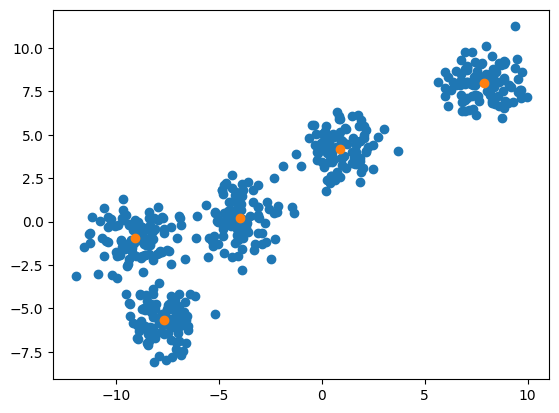

In [16]:
plt.scatter(X[:,0],X[:,1])
plt.scatter(centers[:,0], centers[:,1])
plt.show()